<a href="https://colab.research.google.com/github/sariyaansari/TensorFlow/blob/main/01_regression_intro_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Neural Network using TensorFlow
`Regression is a mechanism where we predicts numerical value based on variables`

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating dataset manually

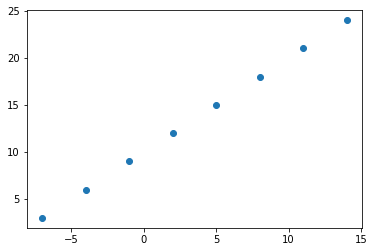

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0 ])

# Visualize
plt.scatter(X, y)

## Input & Ouput Shapes

In [3]:
# Create demo tensor for house price prediction
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [4]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

## Steps in Modelling
1. **Creating a model:** `Define input, ouput & hidden layers of neural network`
2. **Compiling a model:** 
* `Define the loss function which tell how wrong the model is`
* `Define optimizer tells model how to improve the pattern and its learning`
* `Evaluation matrix, what we can use to interpret the performance of model`
3. **Fitting a model:** `Letting the model to find patterns between X & y`

In [5]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer="SGD", #stochastic gradient descent
              metrics=["mae"]
              )

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 623ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


## Prediction
`When you do prediction for value X=17.0, expectation will be near to 27.0 (refer X & y data pattern). But resulting value will be 12.0 which is far from the expectation using learning dataset.`
**One obvious reason** `is that the model error i.e. MAE itself is 10.973 (approx 11) which is the error during learning and will reflect in prediction` 


In [6]:
# Let's make the prediction using model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [7]:
# If the error will be zero, what will be the prediction
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving the model
1. **Creating a model:** 
  - `Add more hidden layers/hidden units`
  - `Change the activation function of each layer`
2. **Compiling a model:** 
  - `Change optimization function`
  - `Change learning rate of optimization function`
3. **Fitting a model:** 
  - `Fit the model for more epochs`
  - `Increase the training data`

In [8]:
# 1. Recreating the model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer="SGD",
              metrics=["mae"])

# 3. Fit the model 
# (Adding Improvement:- Train more on training data by increasing epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 304ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [9]:
# Check data again to understand
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Prediction on Improvement-1
`If we check previous prediction done above we can figure out the improvement. coming more than 27. But, if you see the observed and predicted different that is of 2.7 (i.e.approx 3.0). Its a big improvement than older prediction but we can do more`

In [10]:
# Let's make the prediction using model
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

## Improving the model
`Improving the model again`

In [11]:
# 1. Recreating the model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(100, activation="relu"),
          tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer="SGD",
              metrics=["mae"])

# 3. Fit the model 
# (Adding Improvement:- Train more on training data by increasing epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 399ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

## Prediction on Improvement-2
`When you observe the prediction it will look poorer than previous Improvement-1. This could be the case of overfitting that during training model learning is best. But during test it is not doing as expected.`

In [12]:
y_pred = model.predict([17.0])
y_pred

array([[31.223137]], dtype=float32)

## Improving the model
* `Improving the model again
  - Reducing No. of neurons in hidded layer
  - Adding learning rate

In [13]:
# 1. Recreating the model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(100, activation="relu"),
          tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model 
# (Adding Improvement:- Train more on training data by increasing epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 487ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 8ms/step 

## Prediction on Improvement-3
`If we observe the behaviour of this model we can see it is performing pretty well. It gives the more closer value to 27.0 which we were expecting in the beginning.`

In [14]:
y_pred = model.predict([17.0])
y_pred

array([[26.43606]], dtype=float32)

## Evaluating the Model
`So far, we have done lots of analysis on improving the model. Now, we have to evaluate the model to tell how good is that`

To Evaluate a Model we should focus on visualization which includes:
1. The data: what data are we working with? what does it look like?
2. The model: What does model look like
3. The training of a model: how does a model performs while it learns.
4. The predictions of the model: How is the prediction of the model.

`Let's make a bit bigger data again to understand the visualization part which we should follow in real life projects`



In [15]:
tf.random.set_seed(42)

In [16]:
# Create bigger data
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
# Make labels for data X
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

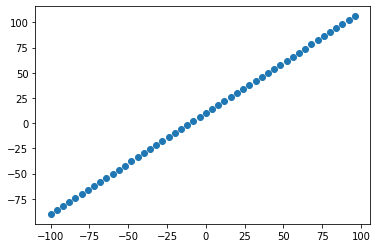

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

`# Splitting data in multiple sets i.e. Training, Validation and Test`

In [19]:
# Check data sample size
len(X)

50

In [20]:
# Split the data into training and test set
X_train = X[:40] # First 40 are training samples
X_test = X[40:] # Last 10 are test samples

y_train = y[:40] # First 40 are training samples
y_test = y[40:] # Last 10 are test samples

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualize Training/Test Data

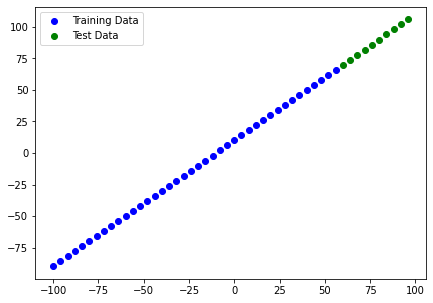

In [21]:
plt.figure(figsize=(7, 5))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")
# Show a legend
plt.legend()

## Build a new Model
`Create a model using input shape`

In [22]:
# input shape will be "1" because for one value of X predicting one y value
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [23]:
# Building a neural network for new X & y data
# 1. Recreating the model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(10, input_shape=[1], name="test_input_layer"),
          tf.keras.layers.Dense(1, name="test_output_layer")], name="test_model") 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer="SGD",
              metrics=["mae"])

# 3. Fit the model 
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [24]:
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test_input_layer (Dense)    (None, 10)                20        
                                                                 
 test_output_layer (Dense)   (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fit the model 
model.fit(X_train, y_train, epochs=100, verbose=0)

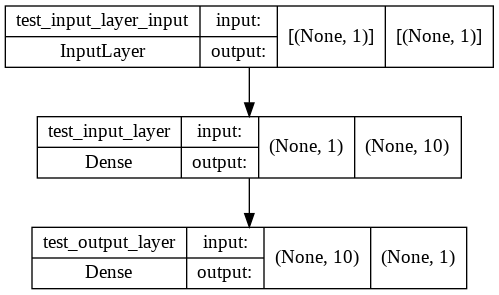

In [26]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualize the model's predictions
`Better way to visualize the prediction (i.e. y_pred in our code) with respect to test (i.e. X_test in our code)`

In [27]:
  # Make predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [28]:
# Check test data
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [29]:
# Let's define a function that can be reused for plotting
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(7, 5))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  # Plot prediction data in red
  plt.scatter(test_data, predictions, c="r", label="Testing Data")
  # Show a legend
  plt.legend()
  

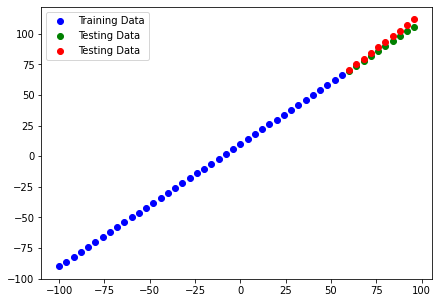

In [30]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

## Evaluate predictions with regression evaluation metrics
`Depending upon the problem statement, there will be different evaluation metrics to evaluate the model's performance.`

`Since we're working on regression, two main metrics are:`
  - `Mean Absolute Error (MAE): On average how wrong is models's prediction`
  - `Mean Squared Error (MSE): Square the average error`

In [31]:
# For example: Evaluate the model on test data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 255ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

`Lets understand how the model evaluation is performed`

In [32]:
# Let's understand the shape of y_test & y_pred
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [33]:
# Let's check the type of y_test & y_pred
type(y_test), type(y_pred)

(tensorflow.python.framework.ops.EagerTensor, numpy.ndarray)

🙅 `We can clearly understand that both the data belongs to different type and shape, therefore we have to make it common to perform evaluation. To do that, we will be squeezing the y_pred data samples`

In [34]:
y_pred = tf.squeeze(y_pred)
y_pred, y_pred.shape

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
         93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
       dtype=float32)>, TensorShape([10]))

In [35]:
# Calculate the mean absolute error, it should be the same 
# as we got using model.evaluate(..) above
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [36]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
         93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
       dtype=float32)>)

In [37]:
# Calculate Mean Square Error
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

⏰ `MSE will always be higher than the MAE because it squares the error`

## Saving & Loading the model 
```
Saving the model allows to use it outside colab such as web app and mobile app
There are two main formats to save
1. SaveModel format
2. HDF5 format
```

In [38]:
# Saving the SavedModel Format
model.save("savedModel_format")

#Saving the HDF5 Format
model.save("HDF5_format")

INFO:tensorflow:Assets written to: savedModel_format/assets
INFO:tensorflow:Assets written to: HDF5_format/assets


In [39]:
# Load the saved model
loaded_saved_model = tf.keras.models.load_model("savedModel_format")
loaded_saved_model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test_input_layer (Dense)    (None, 10)                20        
                                                                 
 test_output_layer (Dense)   (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Use the loaded model to predict again and compare
model_a_preds = model.predict(X_test) #model which were created earlier 
model_saved_preds = loaded_saved_model.predict(X_test) #saved model reused
model_a_preds == model_saved_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [41]:
model_a_preds.squeeze(), model_saved_preds.squeeze()

(array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
         93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
       dtype=float32),
 array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
         93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
       dtype=float32))

✅ `Similarly HDF5 Model load operations can also be done`

# Regression Analysis on Multi-Dimensional Data

### Load and Preprocess Data

In [42]:
import pandas as pd

In [43]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
insurance.size

9366

In [45]:
# Let's do one hot encoding to make all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [46]:
# Create X & y (Features and Labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [47]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [48]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
# Let's do split for training and testing samples 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

### Create the model

In [50]:
# 1. Creating the insurance model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
                                       ]) 

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer="SGD",
                        metrics=["mae"])

# 3. Fit the model 
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8627.7109 - mae: 8627.7109
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7879.1133 - mae: 7879.1133
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7589.4092 - mae: 7589.4092
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7824.0122 - mae: 7824.0122
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7657.5889 - mae: 7657.5889
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7649.4648 - mae: 7649.4648
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7549.8232 - mae: 7549.8232
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7721.1255 - mae: 7721.1255
Epoch 9/100
34/34 [==============================] - 0s 8ms/step - loss: 7626.3506 - mae: 7626.3506
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7700.9844 - mae: 7700.9844

### Evaluate & Review the model

In [51]:
# Evaluate the mode
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8443.0381 - mae: 8443.0381


[8443.0380859375, 8443.0380859375]

🍷 `Let's understand the loss & error with respect to the data samples by looking at median & mode of training data`


In [52]:
# Check Training data median & mode
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

🛑 `If you observe MAE after evaluation and the y_train mean above, you can clearly observed the deviation is huge & model is performing poor`
```
Let's improve the model
```

### Improve the model
```
1. Add extra layer
2. Change the opitmizer
3. Train longer (e.g. 200 epochs)
```

In [53]:
# 1. Creating the insurance model
insurance_model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
                                       ]) 

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer="Adam",
                        metrics=["mae"])

# 3. Fit the model 
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [54]:
# 1. Creating the insurance model
insurance_model_3 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
                                       ]) 

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer="Adam",
                        metrics=["mae"])

# 3. Fit the model 
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

### Evaluate improved model

In [55]:
insurance_model_2.evaluate(X_test, y_test)
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3477.2637 - mae: 3477.2637


[3477.263671875, 3477.263671875]

😻 `We can observe the improvement in comparison of previous model`

### Plot the loss curve or training curve 

Text(0.5, 0, 'epochs')

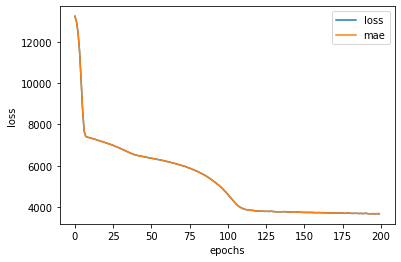

In [56]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing Data (Normalization & Standardization)

**Normalization:** `Converts all values between 0 & 1 whilst preserving the original distribution. Use as default scalar with neural networks.`

**Standardization:** `Transforms the feature to have close to normal distribution. This reduces the effect of outliers. It removes the mean and divides each value by Standard Deviation`

## Understand Visualization

In [57]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


```
Let's visualize some data and understand its distibution
```

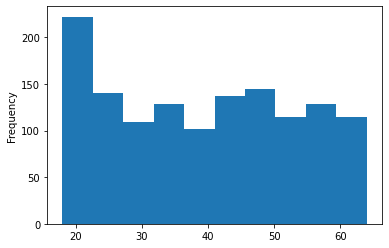

In [58]:
X["age"].plot(kind="hist")

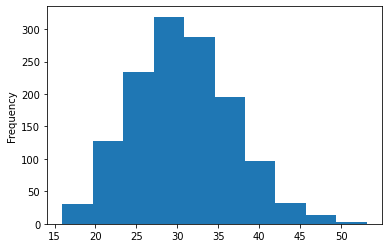

In [59]:
X["bmi"].plot(kind="hist")

In [60]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Column Transformer & Normalization

In [61]:
# Let's read the insurance data again to have a fresh copy
# Read the insurance dataset
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all columns range between 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance_df.drop("charges", axis=1)
y = insurance_df["charges"]

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and testing data with normalization (MinMaxScaler) & OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [63]:
# Let's check how the data looks now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [64]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [65]:
# Check the shape 
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

## Model Preparation

In [66]:
# Set the random seed
tf.random.set_seed(42)

# Create the model 
insurance_model_4 = tf.keras.Sequential([
                                      tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)
                                      ])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

## Model Evaluation

In [67]:
# Evaluate the model created above
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [68]:
# Model summary
insurance_model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1200      
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


## Prediction

In [91]:
# Test data
X_test_normal[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [70]:
X_test_normal.ndim, X_test_normal.shape, tf.expand_dims(X_test_normal, axis=-1).shape

(2, (268, 11), TensorShape([268, 11, 1]))

In [71]:
# Labels for test data
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [93]:
## Prediction on test data
y_pred = insurance_model_4.predict(tf.expand_dims(X_test_normal, axis=-1)) 
y_pred

array([[ 9370.102  ],
       [ 6081.387  ],
       [34306.977  ],
       [ 9263.357  ],
       [22010.977  ],
       [ 5811.723  ],
       [ 1097.7377 ],
       [13562.181  ],
       [ 3558.2178 ],
       [10232.391  ],
       [25395.139  ],
       [ 7783.7217 ],
       [ 4269.6084 ],
       [30744.377  ],
       [33217.098  ],
       [30421.059  ],
       [10771.812  ],
       [30369.96   ],
       [ 8753.371  ],
       [28663.072  ],
       [ 3957.3088 ],
       [ 8064.9087 ],
       [  685.9142 ],
       [ 3190.0032 ],
       [10949.834  ],
       [11396.46   ],
       [12444.902  ],
       [ 4894.4243 ],
       [ 9986.373  ],
       [  459.87054],
       [ 8363.679  ],
       [11825.045  ],
       [ 2007.741  ],
       [ 5123.159  ],
       [ 2948.7256 ],
       [ 8891.232  ],
       [ 1886.1667 ],
       [ 7992.259  ],
       [31333.244  ],
       [26854.414  ],
       [ 3084.7063 ],
       [ 2315.7197 ],
       [11812.177  ],
       [11530.601  ],
       [ 5608.5093 ],
       [11

In [101]:
#Prediction on new data
new_data = tf.constant([[0.66695652, 0.44791499, 0.4, 1., 0., 1. ,1. , 0. ,0. ,0. , 0.]])

In [99]:
# Check X_test_normal data properties
type(X_test_normal), tf.expand_dims(X_test_normal, axis=-1).shape, tf.expand_dims(X_test_normal, axis=-1).ndim

(numpy.ndarray, TensorShape([268, 11, 1]), 3)

In [102]:
# Check new_data data properties
type(new_data), tf.expand_dims(new_data, axis=-1).shape, tf.expand_dims(new_data, axis=-1).ndim

(tensorflow.python.framework.ops.EagerTensor, TensorShape([1, 11, 1]), 3)

In [104]:
new_y_pred = insurance_model_4.predict(tf.expand_dims(new_data, axis=-1))
new_y_pred

array([[23362.945]], dtype=float32)